In [3]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [4]:
from tensorflow.keras.datasets import fashion_mnist

In [5]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [6]:
x_train.shape, y_train.shape

((60000, 28, 28), (60000,))

Text(0.5, 1.0, '7')

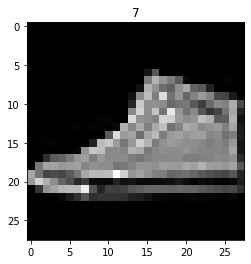

In [23]:
i = np.random.randint(0,60000)
plt.imshow(x_train[i], cmap='gray')
plt.title(y_train[i])

In [8]:
x_train = x_train/255
x_test = x_test/255

#noise

In [9]:
noise_amp = 0.2
added_noise = noise_amp * np.random.randn(*(28,28))

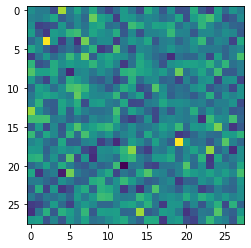

In [10]:
plt.imshow(added_noise)

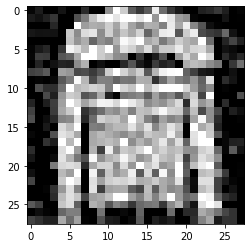

In [11]:
plt.imshow(np.clip(x_train[5]+noise_amp * np.random.randn(*(28,28)),0.,1.), cmap='gray')

In [12]:
x_train_noise = []

for image in x_train:
  x_train_noise.append(np.clip(image+noise_amp * np.random.randn(*(28,28)),0.,1.))

In [13]:
x_train_noise = np.array(x_train_noise)
x_train_noise.shape

(60000, 28, 28)

In [14]:
x_test_noise = []
noise_amp = 0.3
for image in x_test:
  x_test_noise.append(np.clip(image+noise_amp * np.random.randn(*(28,28)),0.,1.))

In [15]:
x_test_noise = np.array(x_test_noise)

#Model

In [16]:
autoencoder = tf.keras.models.Sequential()

#Encoder
autoencoder.add(tf.keras.layers.Conv2D(filters = 16, kernel_size = (3,3), strides = 1, padding = 'same', input_shape = (28,28,1)))
autoencoder.add(tf.keras.layers.MaxPooling2D((2,2),padding = 'same'))
autoencoder.add(tf.keras.layers.Conv2D(filters = 8, kernel_size = (3,3), strides = 1, padding = 'same'))
autoencoder.add(tf.keras.layers.MaxPooling2D((2,2),padding = 'same'))

#Encoded
autoencoder.add(tf.keras.layers.Conv2D(filters = 8, kernel_size = (3,3), strides = 1, padding = 'same'))

autoencoder.add(tf.keras.layers.UpSampling2D((2,2)))
autoencoder.add(tf.keras.layers.Convolution2DTranspose(8,(3,3), padding = 'same'))
autoencoder.add(tf.keras.layers.UpSampling2D((2,2)))
autoencoder.add(tf.keras.layers.Convolution2DTranspose(1,(3,3), padding = 'same', activation = 'sigmoid'))

autoencoder.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 16)        160       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 8)         1160      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 8)          0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 8)           584       
                                                                 
 up_sampling2d (UpSampling2D  (None, 14, 14, 8)        0

In [17]:
autoencoder.compile(optimizer = tf.keras.optimizers.Adam(lr = 0.001), loss = 'binary_crossentropy',)

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [18]:
hist = autoencoder.fit(x_train_noise.reshape(-1,28,28,1),x_train.reshape(-1,28,28,1), epochs=50,batch_size=200)

Epoch 1/50
300/300 [==============================] - 9s 4ms/step - loss: 0.3632
Epoch 2/50
300/300 [==============================] - 1s 4ms/step - loss: 0.3097
Epoch 3/50
300/300 [==============================] - 1s 4ms/step - loss: 0.3043
Epoch 4/50
300/300 [==============================] - 1s 4ms/step - loss: 0.3013
Epoch 5/50
300/300 [==============================] - 1s 4ms/step - loss: 0.2992
Epoch 6/50
300/300 [==============================] - 1s 4ms/step - loss: 0.2976
Epoch 7/50
300/300 [==============================] - 1s 4ms/step - loss: 0.2965
Epoch 8/50
300/300 [==============================] - 1s 4ms/step - loss: 0.2956
Epoch 9/50
300/300 [==============================] - 1s 4ms/step - loss: 0.2948
Epoch 10/50
300/300 [==============================] - 1s 4ms/step - loss: 0.2942
Epoch 11/50
300/300 [==============================] - 1s 4ms/step - loss: 0.2935
Epoch 12/50
300/300 [==============================] - 1s 4ms/step - loss: 0.2930
Epoch 13/50
300/300 [====

In [19]:
denoise = autoencoder.predict(x_test_noise.reshape(-1,28,28))

313/313 [==============================] - 1s 2ms/step


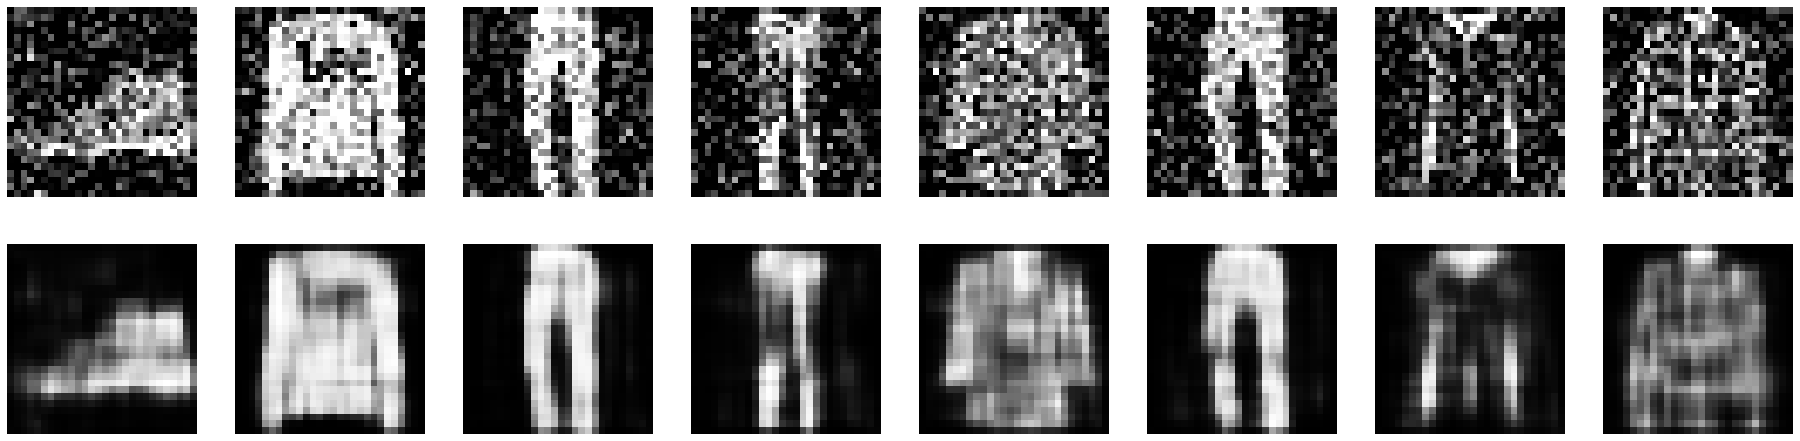

In [24]:
fig, axes = plt.subplots(2,8,figsize=(32,8))
for images, row in zip([x_test_noise[:15], denoise],axes):
  for image, ax in zip(images,row):
    ax.axis('off')
    ax.imshow(image.reshape(28,28),cmap='gray')